In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from torsionfit.toy_model import ToyModel
import torsionfit.backends.sqlite_plus as db
import torsionfit.plots as plots
from parmed.topologyobjects import DihedralType
from pymc import MCMC
from pymbar.timeseries import detectEquilibration
import numpy as np


In [2]:
toy = ToyModel(sample_phase=True, rj=False)

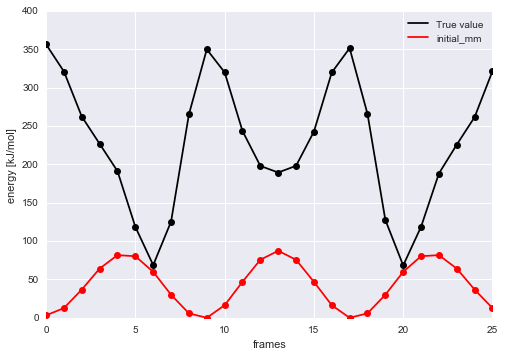

In [4]:
plt.plot(toy.synthetic_energy, color='black', label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='r', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

In [6]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='discrete_phase_randomized.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 323.3 sec

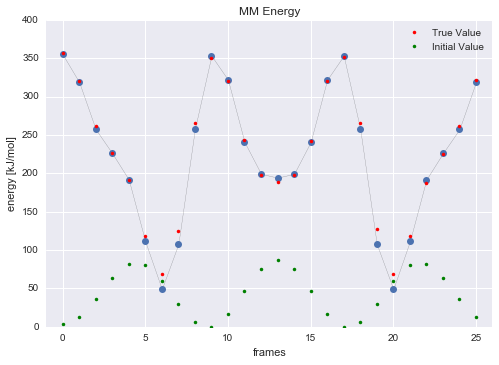

In [8]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, '.', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, '.', color='g', label='Initial Value')
plt.legend()
plt.savefig('energy_fit_discrete_randomized.pdf')

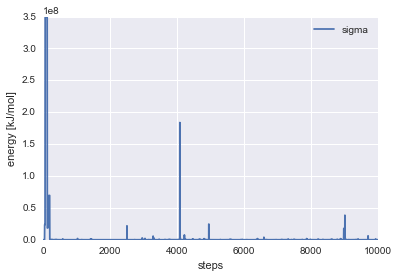

In [11]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_discrete_randomized.pdf')

In [12]:
[t, g, N_eff] = detectEquilibration(sampler.trace('sigma')[:])
print('Start of equilibrated data: {}'.format(t))

Start of equilibrated data: 964


In [21]:
print('True value: {}'.format(toy.true_value[0]))
print(toy.true_value[1])
print(toy.true_value[2])
print(toy.true_value[3])


True value: <DihedralType; phi_k=19.834, per=3, phase=0.000,  scee=1.000, scnb=1.000>
<DihedralType; phi_k=15.281, per=2, phase=0.000,  scee=1.000, scnb=1.000>
<DihedralType; phi_k=11.948, per=4, phase=180.000,  scee=1.000, scnb=1.000>
<DihedralType; phi_k=7.427, per=6, phase=0.000,  scee=1.000, scnb=1.000>


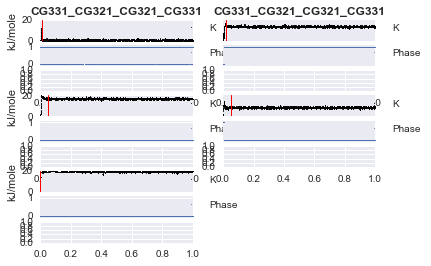

In [22]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0, filename='traces_discrete_random.pdf')

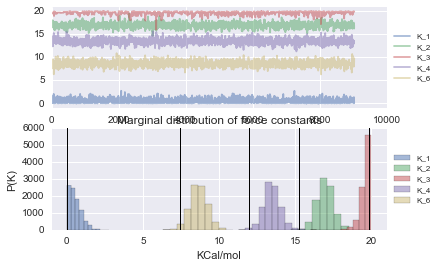

In [49]:
alpha = 0.5
plt.subplot(2, 1, 1)
plt.plot(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_1', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_2_K.trace[t:], label='K_2', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_3_K.trace[t:], label='K_3', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_6_K.trace[t:], label='K_6', alpha=alpha)
plt.ylim(-1, 21)
lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(2, 1, 2)
plt.hist(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_1', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_2_K.trace[t:], label='K_2', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_3_K.trace[t:], label='K_3', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_6_K.trace[t:], label='K_6', alpha=alpha)
plt.xlim(-1, 21)
plt.axvline(x=toy.true_value[0].phi_k, ymin=-1, ymax=21, color='black', linewidth=1.0)
plt.axvline(x=toy.true_value[1].phi_k, ymin=-1, ymax=21, color='black', linewidth=1.0)
plt.axvline(x=toy.true_value[2].phi_k, ymin=-1, ymax=21, color='black', linewidth=1.0)
plt.axvline(x=toy.true_value[3].phi_k, ymin=-1, ymax=21, color='black', linewidth=1.0)
plt.axvline(0, ymin=-1, ymax=21, color='black', linewidth=1.0)



lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('Marginal distribution of force constants')
plt.xlabel('KCal/mol')
plt.ylabel('P(K)')
plt.savefig('trac_hist_randomized.pdf')